In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from keras.layers import  Dropout

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Havells_Assignment/Dataset/train'
valid_path = '/content/drive/MyDrive/Havells_Assignment/Dataset/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Havells_Assignment/Dataset/train/*')

In [ ]:
len(folders)

3

In [ ]:
top_model = Flatten()(inception.output)
top_model = Dense(512, activation='relu')(top_model)
top_model = Dense(128, activation='relu')(top_model)
x = Dropout(0.5)(top_model)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
  model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Havells_Assignment/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 30 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Havells_Assignment/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 17 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-dcaa1ca38143>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
1/1 [==============================] - 24s 24s/step - loss: 2.3318 - accuracy: 0.2333 - val_loss: 22.5595 - val_accuracy: 0.3529
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 22.4057 - accuracy: 0.3000 - val_loss: 17.7300 - val_accuracy: 0.3529
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 26.7062 - accuracy: 0.3000 - val_loss: 5.7713 - val_accuracy: 0.5294
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 15.2885 - accuracy: 0.5333 - val_loss: 16.0862 - val_accuracy: 0.2941
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 19.9836 - accuracy: 0.4667 - val_loss: 7.1708 - val_accuracy: 0.4118
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 10.3909 - accuracy: 0.5667 - val_loss: 7.4043 - val_accuracy: 0.3529
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 3.2461 - accuracy: 0.8000 - val_loss: 6.3633 - val_accuracy: 0.4706
Epoch 8/20
1/1 [===============

In [ ]:
import matplotlib.pyplot as plt

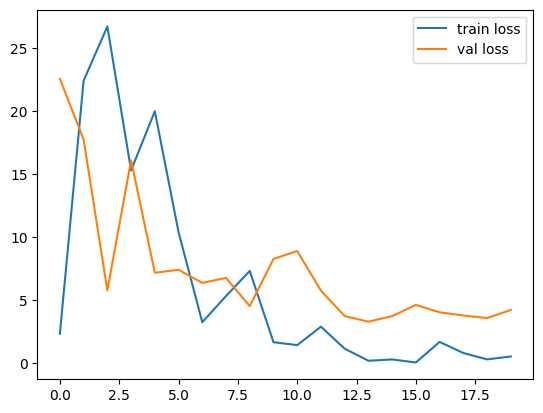

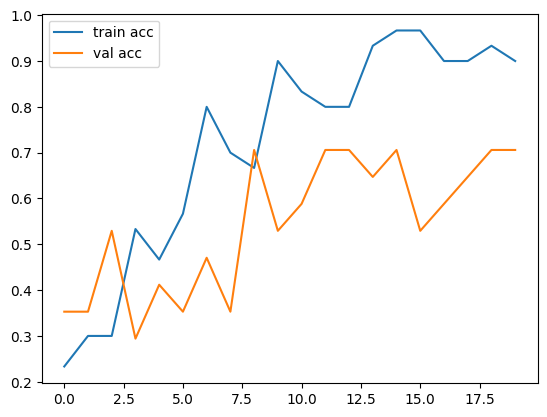

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
import pickle
with open('inception_model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
# Load model

In [ ]:
img=image.load_img('/content/drive/MyDrive/Havells_Assignment/Swiggy_2.jpg',target_size=(224,224))

In [ ]:

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
x=x/255

In [ ]:
class_indices = test_set.class_indices
class_labels = {v: k for k, v in class_indices.items()}
print(class_labels)

{0: 'Others', 1: 'Swiggy', 2: 'UberEats'}


In [ ]:
predictions = model.predict(x)

1/1 [==============================] - 2s 2s/step


In [ ]:
predicted_class_index = np.argmax(predictions)

In [ ]:
predicted_class_label = class_labels[predicted_class_index]

In [ ]:
print("Predicted class label:", predicted_class_label)

Predicted class label: Others


In [ ]:
from google.colab import files
files.download("/content/model_inception.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
with open('inception_model_pkl_3', 'wb') as files:
    pickle.dump(model, files)
